## MARBL diagnostics for ocean history files: 

### JRA-forced MOM6-MARBL - zstar case 27: Increase K_Fe for coccos from 3.2e-05 to 3.5e-05

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os
from glob import glob
from collections import OrderedDict
import xarray as xr
import numpy as np
#import esmlab
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
#from scipy import stats

import utils
import pandas as pd
import pop_tools
#import tools

import matplotlib.colors as colors

### Define case

In [2]:
case = 'g.e23_a17c.GMOMMARBL_JRA.TL319_t232_zstar_N65.2024.027'
user = 'klindsay'

## Define the year range to examine and get the CESM history files

In [3]:
start_yr = 46
num_years = 5
endyr = start_yr + num_years 

#### first get the 3-D variables

In [4]:
files = []
for year in range(start_yr,endyr):
    yr4="{:04d}".format(year)
    print('doing simulation year', year, '!')
    for month in range(1, 13):
    
        mo2="{:02d}".format(month)
        files.extend(sorted(glob(f'/glade/derecho/scratch/{user}/archive/{case}/ocn/hist/{case}.mom6.h.bgc.z.{yr4}-{mo2}.nc')))
        #files.extend(sorted(glob(f'/glade/scratch/{user}/{case}/run/{case}.pop.h.{yr4}-{mo2}.nc')))

doing simulation year 46 !
doing simulation year 47 !
doing simulation year 48 !
doing simulation year 49 !
doing simulation year 50 !


In [5]:
cesm_mon_ds = xr.open_mfdataset(files,decode_times=True,decode_coords=False, concat_dim='time')

In [6]:
cesm_mon_ds

<xarray.Dataset>
Dimensions:               (nbnd: 2, time: 60, xh: 540, yh: 480, z_i: 35, z_l: 34)
Coordinates:
  * xh                    (xh) float64 -286.7 -286.0 -285.3 ... 71.33 72.0 72.67
  * yh                    (yh) float64 -81.56 -81.46 -81.36 ... 87.71 87.74
  * z_l                   (z_l) float64 2.5 10.0 20.0 ... 5e+03 5.5e+03 6e+03
  * z_i                   (z_i) float64 0.0 5.0 15.0 ... 5.75e+03 6.25e+03
  * time                  (time) object 0046-01-16 12:00:00 ... 0050-12-16 12...
  * nbnd                  (nbnd) float64 1.0 2.0
Data variables: (12/122)
    BOT_FLUX_TO_TEND      (time, z_l, yh, xh) float64 dask.array<chunksize=(1, 34, 480, 540), meta=np.ndarray>
    ALK                   (time, z_l, yh, xh) float64 dask.array<chunksize=(1, 34, 480, 540), meta=np.ndarray>
    DIC                   (time, z_l, yh, xh) float64 dask.array<chunksize=(1, 34, 480, 540), meta=np.ndarray>
    J_DIC                 (time, z_l, yh, xh) float64 dask.array<chunksize=(1, 34, 480, 540), meta=np.ndarray>
    DOC                   (time, z_l, yh, xh) float64 dask.array<chunksize=(1, 34, 480, 540), meta=np.ndarray>
    DOCr                  (time, z_l, yh, xh) float64 dask.array<chunksize=(1, 34, 480, 540), meta=np.ndarray>
    ...                    ...
    volcello              (time, z_l, yh, xh) float64 dask.array<chunksize=(1, 34, 480, 540), meta=np.ndarray>
    h                     (time, z_l, yh, xh) float64 dask.array<chunksize=(1, 34, 480, 540), meta=np.ndarray>
    average_T1            (time) object dask.array<chunksize=(1,), meta=np.ndarray>
    average_T2            (time) object dask.array<chunksize=(1,), meta=np.ndarray>
    average_DT            (time) timedelta64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    time_bounds           (time, nbnd) object dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes:
    NumFilesInSet:     1
    title:             MOM6 diagnostic fields table for CESM case: g.e23_a17c...
    associated_files:  areacello: g.e23_a17c.GMOMMARBL_JRA.TL319_t232_zstar_N...
    grid_type:         regular
    grid_tile:         N/A

#### Now grab the 2-D variables

In [7]:
files = []
for year in range(start_yr,endyr):
    yr4="{:04d}".format(year)
    print('doing simulation year', year, '!')
    for month in range(1, 13):
    
        mo2="{:02d}".format(month)
        files.extend(sorted(glob(f'/glade/derecho/scratch/{user}/archive/{case}/ocn/hist/{case}.mom6.h.bgc.native.{yr4}-{mo2}.nc')))
        #files.extend(sorted(glob(f'/glade/scratch/{user}/{case}/run/{case}.pop.h.{yr4}-{mo2}.nc')))

doing simulation year 46 !
doing simulation year 47 !
doing simulation year 48 !
doing simulation year 49 !
doing simulation year 50 !


In [8]:
cesm_mon_ds2 = xr.open_mfdataset(files,decode_times=True,decode_coords=False, concat_dim='time')

### Keep only the variables we need (use this list for both 2-D and 3-D datasets)

In [9]:
variables2d = ['sp_Fe_lim_surf','sp_P_lim_surf','sp_N_lim_surf',
             'diat_Fe_lim_surf', 'diat_P_lim_surf','diat_N_lim_surf',
             'diat_SiO3_lim_surf','diaz_P_lim_surf',
             'diaz_Fe_lim_surf','photoC_TOT_zint','photoC_sp_zint',
             'photoC_diat_zint','photoC_diaz_zint','photoC_cocco_zint',
             'cocco_Fe_lim_surf','cocco_C_lim_surf','cocco_N_lim_surf',
             'cocco_P_lim_surf','CaCO3_PROD_zint','POC_FLUX_100m',
             'x_graze_microzoo_zint','x_graze_mesozoo_zint',
            'IFRAC'] 

variables3d = ['SiO2_PROD','coccoCaCO3','diatC', 'coccoC','spC','diazC','SALT',
             'PO4','Fe','NO3','SiO3','ALK','photoC_TOT_zint_100m',
            'microzooC','mesozooC','diaz_Nfix',
            'spChl','diatChl','diazChl','coccoChl','so'] 


coords = {'x':'yh','y':'xh'}

In [10]:
keepthese=['z_l','z_i','time_bounds','time','average_T1', 'average_T2','average_DT'] + variables3d + list(coords.values())
cesm_mon_ds = cesm_mon_ds.drop([v for v in cesm_mon_ds.variables if v not in keepthese])

In [11]:
keepthese=['z_l','z_i','time_bounds','time','average_T1', 'average_T2','average_DT'] + variables2d + list(coords.values())
cesm_mon_ds2 = cesm_mon_ds2.drop([v for v in cesm_mon_ds2.variables if v not in keepthese])

## Get the grid data for MOM6

In [12]:
ds_grid = xr.open_dataset(f'/glade/work/kristenk/cesm_work/mom6_static_files/g.e23b16.TL319_t232.GIAFMARBL.001.mom6.h.static.nc')

In [13]:
lons = ds_grid.geolon
lats = ds_grid.geolat
area = ds_grid.areacello #m2

#### Make my own dz variable

In [14]:
dz = np.zeros([34])

i = 0

for int in cesm_mon_ds.z_i.values[1:35]:
    
    level_up = cesm_mon_ds.z_i.values[i]
    #print(level_up,int)
    dz[i] = int - level_up

    i = i + 1

dz = xr.DataArray(dz,dims=('z_l'))

### spin up a bit of dask

In [15]:
def get_ClusterClient():
    import dask
    from dask_jobqueue import PBSCluster
    from dask.distributed import Client
    cluster = PBSCluster(
        cores=2,
        memory='25 GB',
        processes=1,
        queue='casper',
        resource_spec='select=1:ncpus=1:mem=25GB',
        project='NCGD0011',
        walltime='03:00:00',
        interface='ext',)

    dask.config.set({
        'distributed.dashboard.link':
        'https://jupyterhub.hpc.ucar.edu/stable/user/{USER}/proxy/{port}/status'
    })
    client = Client(cluster)
    return cluster, client

In [16]:
cluster, client = get_ClusterClient()
cluster.scale(12) 
client

<Client: 'tcp://128.117.208.54:45439' processes=0 threads=0, memory=0 B>

### Make the annual mean

In [17]:
cesm_ann_ds = cesm_mon_ds.mean(dim='time', keep_attrs=True).compute()

In [18]:
cesm_ann_ds2 = cesm_mon_ds2.mean(dim='time', keep_attrs=True).compute()

### Turn the monthly ds into a climatology

In [19]:
cesm_mon_ds = cesm_mon_ds.groupby('time.month').mean('time', keep_attrs=True)

In [20]:
cesm_mon_ds2 = cesm_mon_ds2.groupby('time.month').mean('time', keep_attrs=True)

## Compare macronutrients to World Ocean Atlas 2018

In [26]:
depths = cesm_mon_ds.z_l

In [27]:
path = '/glade/work/kristenk/WOA_data'

files = [path+'/woa18_all_n00_01.nc', path+'/woa18_all_p00_01.nc',path+'/woa18_all_i00_01.nc']
ds_woa = xr.open_mfdataset(files, decode_times=False, decode_coords=False)

### Calculate grid cell area on the WOA grid (regular 1° lon/lat)

In [28]:
a = xr.DataArray(np.zeros([180,360]), dims=('lat','lon'))

j=0

for lat in ds_woa.lat.values:

    pi     =    3.14159265359
    radius = 6378.137
    deg2rad = pi / 180.0
    resolution_lat =1 #res in degrees
    resolution_lon =1 #res in degrees
    elevation = deg2rad * (lat + (resolution_lat / 2.0))
    deltalat = deg2rad * resolution_lon
    deltalon = deg2rad * resolution_lat
    a[j,:] = (2.0*radius**2*deltalon*np.cos(elevation)*np.sin((deltalat/2.0)))
    j = j + 1

ds_woa['area']=a

### Surface nutrients

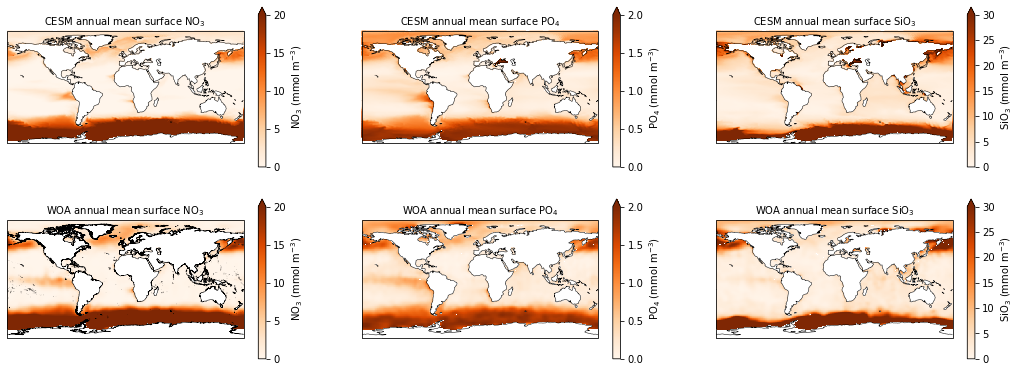

In [29]:
fig = plt.figure(figsize=(18,10))

####################NO3
#COLUMN 1  - NO3
#---- CESM panel
ax = fig.add_subplot(3,3,1, projection=ccrs.PlateCarree())
#ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)
ax.set_title('CESM annual mean surface NO$_3$', fontsize=10)
field = cesm_ann_ds.NO3.isel(z_l=0)
pc1=ax.pcolormesh(lons, lats, field, 
                  vmin=0, vmax=20, cmap='Oranges',
                  transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc1, ax=ax,extend='max',label='NO$_3$ (mmol m$^{-3}$)')

#---- OBS panel
ax = fig.add_subplot(3,3,4, projection=ccrs.PlateCarree())
#ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5)
ax.set_title('WOA annual mean surface NO$_3$', fontsize=10)
field = (ds_woa.n_an.isel(depth=0) * 1.026).squeeze() #convert from µmol/kg to mmol/m3
pc2=ax.pcolormesh(ds_woa.lon, ds_woa.lat, field, 
                  vmin=0, vmax=20, cmap='Oranges',
                  transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc2, ax=ax,extend='max',label='NO$_3$ (mmol m$^{-3}$)')

# #---- DIFF panel
# ax = fig.add_subplot(3,3,7, projection=ccrs.PlateCarree())
# ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())
# ax.coastlines('10m',linewidth=0.5)
# ax.set_title('Surface NO$_3$ model bias', fontsize=10)
# lon, lat, field = utils.adjust_pop_grid(lons, lats,  NO3_diff.isel(z_t=0))
# pc3=ax.pcolormesh(lon, lat, 
#                  field, vmin=-10, vmax=10, cmap='bwr',
#                  transform=ccrs.PlateCarree())
# cbar1 = fig.colorbar(pc3, ax=ax,extend='both',label='NO$_3$ bias (mmol m$^{-3}$)')



####################PO4
#---- CESM panel
ax = fig.add_subplot(3,3,2, projection=ccrs.PlateCarree())
#ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)
ax.set_title('CESM annual mean surface PO$_4$', fontsize=10)
field = cesm_ann_ds.PO4.isel(z_l=0)
pc1=ax.pcolormesh(lons, lats, field, 
                  vmin=0, vmax=2, cmap='Oranges',
                  transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc1, ax=ax,extend='max',label='PO$_4$ (mmol m$^{-3}$)')

#---- OBS panel
ax = fig.add_subplot(3,3,5, projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)
ax.set_title('WOA annual mean surface PO$_4$', fontsize=10)
field = (ds_woa.p_an.isel(depth=0) * 1.026).squeeze() #convert from µmol/kg to mmol/m3
pc2=ax.pcolormesh(ds_woa.lon, ds_woa.lat, field, 
                  vmin=0, vmax=2, cmap='Oranges',
                  transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc2, ax=ax,extend='max',label='PO$_4$ (mmol m$^{-3}$)')

# #---- DIFF panel
# ax = fig.add_subplot(3,3,8, projection=ccrs.PlateCarree())
# ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())
# ax.coastlines('10m',linewidth=0.5)
# ax.set_title('Surface PO$_4$ bias', fontsize=10)
# lon, lat, field = utils.adjust_pop_grid(lons, lats,  PO4_diff.isel(z_t=0))
# pc3=ax.pcolormesh(lon, lat, 
#                  field, vmin=-1, vmax=1, cmap='bwr',
#                  transform=ccrs.PlateCarree())
# cbar1 = fig.colorbar(pc3, ax=ax,extend='both',label='PO$_4$ bias (mmol m$^{-3}$)')



####################SiO3
#---- CESM panel
ax = fig.add_subplot(3,3,3, projection=ccrs.PlateCarree())
#ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)
ax.set_title('CESM annual mean surface SiO$_3$', fontsize=10)
field = cesm_ann_ds.SiO3.isel(z_l=0)
pc1=ax.pcolormesh(lons, lats, field, 
                  vmin=0, vmax=30, 
                  cmap='Oranges',
                  transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc1, ax=ax,extend='max',label='SiO$_3$ (mmol m$^{-3}$)')

#---- OBS panel
ax = fig.add_subplot(3,3,6, projection=ccrs.PlateCarree())
#ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)
ax.set_title('WOA annual mean surface SiO$_3$', fontsize=10)
field = (ds_woa.i_an.isel(depth=0) * 1.026).squeeze()  #convert from µmol/kg to mmol/m3
pc2=ax.pcolormesh(ds_woa.lon, ds_woa.lat, field, 
                  vmin=0, vmax=30, 
                  cmap='Oranges',
                  transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc2, ax=ax,extend='max',label='SiO$_3$ (mmol m$^{-3}$)')

# #---- DIFF panel
# ax = fig.add_subplot(3,3,9, projection=ccrs.PlateCarree())
# ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())
# ax.coastlines('10m',linewidth=0.5)
# ax.set_title('Surface SiO$_3$ bias', fontsize=10)
# lon, lat, field = utils.adjust_pop_grid(lons, lats,  SiO3_diff.isel(z_t=0))
# pc3=ax.pcolormesh(lon, lat, 
#                  field, 
#                   vmin=-15, vmax=15, 
#                   cmap='bwr',
#                  transform=ccrs.PlateCarree())
# cbar1 = fig.colorbar(pc3, ax=ax,extend='both',label='SiO$_3$ bias (mmol m$^{-3}$)')



### Global nutrient profiles

In [21]:
area_depth = area.where(cesm_ann_ds.ALK > 0)

In [31]:
area_depth_woa = ds_woa.area.where(ds_woa.n_an > 0).squeeze()

In [32]:
ds_glb_nuts = xr.Dataset({v: cesm_ann_ds[v] for v in ['z_l']})
ds_glb_nuts['NO3'] = ((cesm_ann_ds['NO3']*area_depth).sum(dim=('xh','yh'))/(area_depth.sum(dim=('xh','yh')))).compute()
ds_glb_nuts['PO4'] = ((cesm_ann_ds['PO4']*area_depth).sum(dim=('xh','yh'))/(area_depth.sum(dim=('xh','yh')))).compute()
ds_glb_nuts['SiO3'] = ((cesm_ann_ds['SiO3']*area_depth).sum(dim=('xh','yh'))/(area_depth.sum(dim=('xh','yh')))).compute()

In [33]:
ds_glb_woa = xr.Dataset({v: ds_woa[v] for v in ['depth']})
ds_glb_woa['NO3'] = ((ds_woa['n_an']*area_depth_woa).sum(dim=('lon','lat'))/(area_depth_woa.sum(dim=('lon','lat')))).compute()
ds_glb_woa['PO4'] = ((ds_woa['p_an']*area_depth_woa).sum(dim=('lon','lat'))/(area_depth_woa.sum(dim=('lon','lat')))).compute()
ds_glb_woa['SiO3'] = ((ds_woa['i_an']*area_depth_woa).sum(dim=('lon','lat'))/(area_depth_woa.sum(dim=('lon','lat')))).compute()

In [34]:
ds_glb_woa = ds_glb_woa.squeeze()

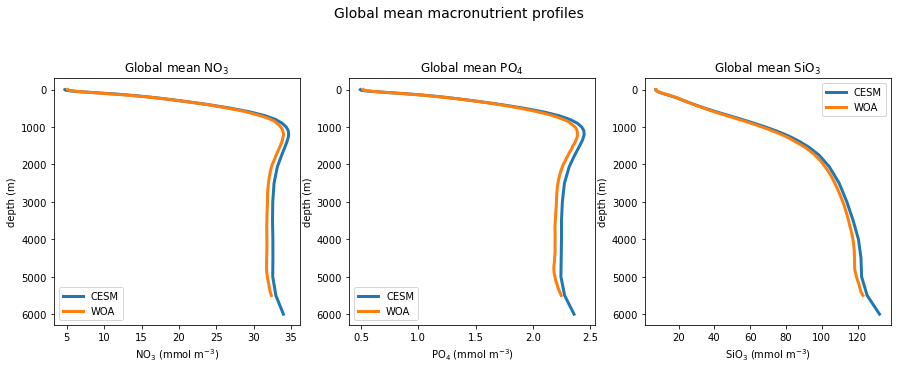

In [35]:
fig = plt.figure(figsize=(15,10))

plt.suptitle('Global mean macronutrient profiles', fontsize=14)


#COLUMN 1  - NO3

ax = fig.add_subplot(2,3,1)
ax.set_title('Global mean NO$_3$')
ax.plot(ds_glb_nuts['NO3'], depths, label='CESM', linewidth=3)
ax.plot(ds_glb_woa['NO3'].values, ds_glb_woa.depth, label='WOA', linewidth=3)
ax.legend()
ax.set(ylabel='depth (m)',xlabel='NO$_3$ (mmol m$^{-3}$)')
plt.gca().invert_yaxis()

#COLUMN 2  - PO4

ax = fig.add_subplot(2,3,2)
ax.set_title('Global mean PO$_4$')
ax.plot(ds_glb_nuts['PO4'].values, depths, label='CESM', linewidth=3)
ax.plot(ds_glb_woa['PO4'].values, ds_glb_woa.depth, label='WOA', linewidth=3)
ax.legend()
ax.set(ylabel='depth (m)',xlabel='PO$_4$ (mmol m$^{-3}$)')
plt.gca().invert_yaxis()

#COLUMN 3  - SiO3

ax = fig.add_subplot(2,3,3)
ax.set_title('Global mean SiO$_3$')
ax.plot(ds_glb_nuts['SiO3'].values, depths, label='CESM', linewidth=3)
ax.plot(ds_glb_woa['SiO3'].values, ds_glb_woa.depth, label='WOA', linewidth=3)
ax.legend()
ax.set(ylabel='depth (m)',xlabel='SiO$_3$ (mmol m$^{-3}$)')
plt.gca().invert_yaxis()


# #COLUMN 1  - NO3 diff

# ax = fig.add_subplot(2,3,4)
# ax.plot(ds_glb_nuts['NO3'].values - ds_glb_woa['NO3'].values, depths, label='bias', linewidth=3, color='green')
# ax.legend()
# ax.set(ylabel='depth (m)',xlabel='NO$_3$ bias (mmol m$^{-3}$)')
# plt.gca().invert_yaxis()

# #COLUMN 2  - PO4 diff

# ax = fig.add_subplot(2,3,5)
# ax.plot(ds_glb['PO4'].values - ds_glb_woa['PO4'].values, depths, label='bias', linewidth=3, color='green')
# ax.legend()
# ax.set(ylabel='depth (m)',xlabel='PO$_4$ bias (mmol m$^{-3}$)')
# plt.gca().invert_yaxis()

# #COLUMN 3  - SiO3 diff

# ax = fig.add_subplot(2,3,6)
# ax.plot(ds_glb['SiO3'].values - ds_glb_woa['SiO3'].values, depths, label='bias', linewidth=3, color='green')
# ax.legend()
# ax.set(ylabel='depth (m)',xlabel='SiO$_3$ bias (mmol m$^{-3}$)')
# plt.gca().invert_yaxis()



### Phytoplankton nutrient limitation at surface

In [36]:
#most limiting nutrient - concatenate the limitation terms so that nutrient limitation terms are each along the 'nutrient' dimension
# 0 = PO4
# 1 = Fe
# 2 = NO3 (only for sp and diat)
# 3 = Si (only for diat)
# 3 = C (only for cocco)

limarray_sp=xr.concat((cesm_ann_ds2.sp_P_lim_surf, cesm_ann_ds2.sp_Fe_lim_surf,cesm_ann_ds2.sp_N_lim_surf),dim='nutrient')
limarray_diat=xr.concat((cesm_ann_ds2.diat_P_lim_surf, cesm_ann_ds2.diat_Fe_lim_surf, cesm_ann_ds2.diat_N_lim_surf, cesm_ann_ds2.diat_SiO3_lim_surf),dim='nutrient')
limarray_diaz=xr.concat((cesm_ann_ds2.diaz_P_lim_surf, cesm_ann_ds2.diaz_Fe_lim_surf),dim='nutrient')
limarray_cocco=xr.concat((cesm_ann_ds2.cocco_P_lim_surf, cesm_ann_ds2.cocco_Fe_lim_surf, cesm_ann_ds2.cocco_N_lim_surf, cesm_ann_ds2.cocco_C_lim_surf),dim='nutrient')

In [37]:
most_lim_sp = limarray_sp.argmin(dim='nutrient', skipna=False).squeeze()
most_lim_diat = limarray_diat.argmin(dim='nutrient', skipna=False).squeeze()
most_lim_diaz = limarray_diaz.argmin(dim='nutrient', skipna=False).squeeze()
most_lim_cocco = limarray_cocco.argmin(dim='nutrient', skipna=False).squeeze()
mask = np.isnan(cesm_ann_ds2.sp_N_lim_surf.squeeze())

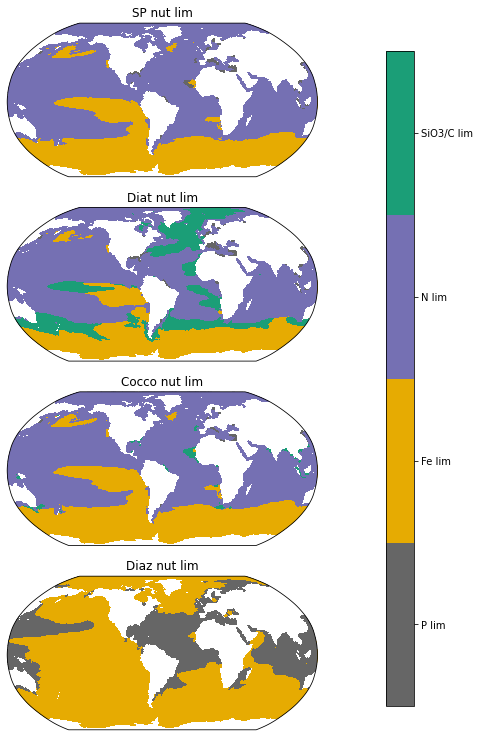

In [38]:
fig = plt.figure(figsize=(8,13))
colorbar_specs = {'ticks' : np.arange(0,4,1)}

ax = fig.add_subplot(4,1,2, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('Diat nut lim', fontsize=12)
field = most_lim_diat.where(~mask)
pc=ax.pcolormesh(lons, lats, field, cmap=plt.cm.get_cmap('Dark2_r',4),vmin=-0.5,vmax=3.5,transform=ccrs.PlateCarree())

ax = fig.add_subplot(4,1,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('SP nut lim', fontsize=12)
field = most_lim_sp.where(~mask)
pc=ax.pcolormesh(lons, lats, field, cmap=plt.cm.get_cmap('Dark2_r',4),vmin=-0.5,vmax=3.5,transform=ccrs.PlateCarree())

ax = fig.add_subplot(4,1,3, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('Cocco nut lim', fontsize=12)
field = most_lim_cocco.where(~mask)
pc=ax.pcolormesh(lons, lats, field, cmap=plt.cm.get_cmap('Dark2_r',4),vmin=-0.5,vmax=3.5,transform=ccrs.PlateCarree())

ax = fig.add_subplot(4,1,4, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('Diaz nut lim', fontsize=12)
field = most_lim_diaz.where(~mask)
pc=ax.pcolormesh(lons, lats, field, cmap=plt.cm.get_cmap('Dark2_r',4),vmin=-0.5,vmax=3.5,transform=ccrs.PlateCarree())

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar = fig.colorbar(pc, cax=cbar_ax,**colorbar_specs)
cbar.ax.set_yticklabels(['P lim', 'Fe lim', 'N lim','SiO3/C lim']);

### Monthly nutrient limitations

In [39]:
#most limiting nutrient - concatenate the limitation terms so that nutrient limitation terms are each along the 'nutrient' dimension
# 0 = PO4
# 1 = Fe
# 2 = NO3 (only for sp and diat)
# 3 = Si (only for diat)
# 3 = C (only for cocco)

limarray_sp=xr.concat((cesm_mon_ds2.sp_P_lim_surf, cesm_mon_ds2.sp_Fe_lim_surf,cesm_mon_ds2.sp_N_lim_surf),dim='nutrient')
limarray_diat=xr.concat((cesm_mon_ds2.diat_P_lim_surf, cesm_mon_ds2.diat_Fe_lim_surf, cesm_mon_ds2.diat_N_lim_surf, cesm_mon_ds2.diat_SiO3_lim_surf),dim='nutrient')
limarray_diaz=xr.concat((cesm_mon_ds2.diaz_P_lim_surf, cesm_mon_ds2.diaz_Fe_lim_surf),dim='nutrient')
limarray_cocco=xr.concat((cesm_mon_ds2.cocco_P_lim_surf, cesm_mon_ds2.cocco_Fe_lim_surf, cesm_mon_ds2.cocco_N_lim_surf, cesm_mon_ds2.cocco_C_lim_surf),dim='nutrient')

In [40]:
most_lim_sp=limarray_sp.argmin(dim='nutrient', skipna=False).squeeze()
most_lim_diat=limarray_diat.argmin(dim='nutrient', skipna=False).squeeze()
most_lim_diaz=limarray_diaz.argmin(dim='nutrient', skipna=False).squeeze()
most_lim_cocco=limarray_cocco.argmin(dim='nutrient', skipna=False).squeeze()
mask = np.isnan(cesm_ann_ds2.sp_N_lim_surf.squeeze())

In [23]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

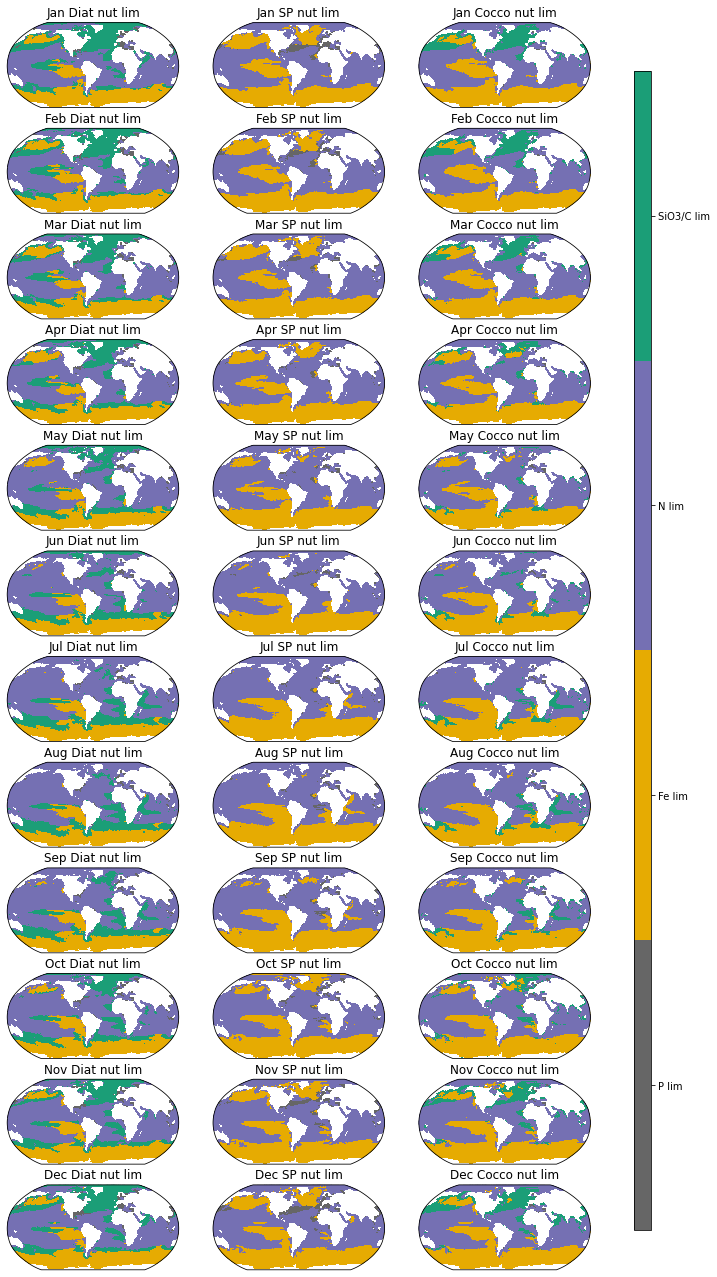

In [41]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

fig = plt.figure(figsize=(12,23))

for row in np.arange(1,13):
    ts=row-1
    
    plot = row*3 - 2
    
    ax = fig.add_subplot(12,3,plot, projection=ccrs.Robinson(central_longitude=305.0))
    ax.set_title(months[ts]+' Diat nut lim', fontsize=12)
    field = most_lim_diat.isel(month=ts).where(~mask)
    pc=ax.pcolormesh(lons, lats, field, cmap=plt.cm.get_cmap('Dark2_r',4),vmin=-0.5,vmax=3.5,transform=ccrs.PlateCarree())
    colorbar_specs = {'ticks' : np.arange(0,4,1)}
    
    plot = row*3 - 1
    ax = fig.add_subplot(12,3,plot, projection=ccrs.Robinson(central_longitude=305.0))
    ax.set_title(months[ts]+' SP nut lim', fontsize=12)
    field = most_lim_sp.isel(month=ts).where(~mask)
    pc=ax.pcolormesh(lons, lats, field, cmap=plt.cm.get_cmap('Dark2_r',4),vmin=-0.5,vmax=3.5,transform=ccrs.PlateCarree())
    colorbar_specs = {'ticks' : np.arange(0,4,1)}
    
    plot = row*3
    ax = fig.add_subplot(12,3,plot, projection=ccrs.Robinson(central_longitude=305.0))
    ax.set_title(months[ts]+' Cocco nut lim', fontsize=12)
    field = most_lim_cocco.isel(month=ts).where(~mask)
    pc=ax.pcolormesh(lons, lats, field, cmap=plt.cm.get_cmap('Dark2_r',4),vmin=-0.5,vmax=3.5,transform=ccrs.PlateCarree())
    colorbar_specs = {'ticks' : np.arange(0,4,1)}

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(pc, cax=cbar_ax,**colorbar_specs)
cbar.ax.set_yticklabels(['P lim', 'Fe lim', 'N lim','SiO3/C lim']);

### Look at phyto carbon pools

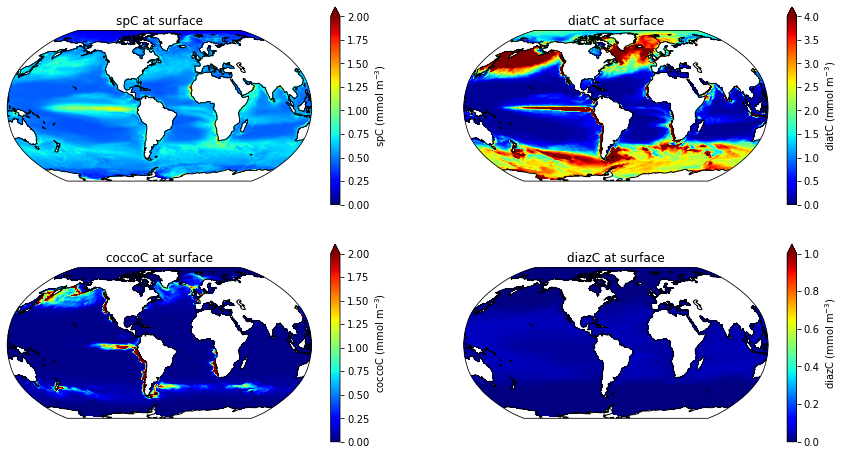

In [42]:
###### 
fig = plt.figure(figsize=(15,8))

ax = fig.add_subplot(2,2,3, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('coccoC at surface', fontsize=12)
pc=ax.pcolormesh(lons, lats, cesm_ann_ds.coccoC.isel(z_l=0), cmap='jet',vmin=0,vmax=2,transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=1)
cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='coccoC (mmol m$^{-3}$)')

ax = fig.add_subplot(2,2,2, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('diatC at surface', fontsize=12)
pc=ax.pcolormesh(lons, lats, cesm_ann_ds.diatC.isel(z_l=0), cmap='jet',vmin=0,vmax=4,transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=1)
cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='diatC (mmol m$^{-3}$)')

ax = fig.add_subplot(2,2,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('spC at surface', fontsize=12)
pc=ax.pcolormesh(lons, lats, cesm_ann_ds.spC.isel(z_l=0), cmap='jet',vmin=0,vmax=2,transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=1)
cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='spC (mmol m$^{-3}$)')

ax = fig.add_subplot(2,2,4, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('diazC at surface', fontsize=12)
pc=ax.pcolormesh(lons, lats, cesm_ann_ds.diazC.isel(z_l=0), cmap='jet',vmin=0,vmax=1,transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=1)
cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='diazC (mmol m$^{-3}$)')

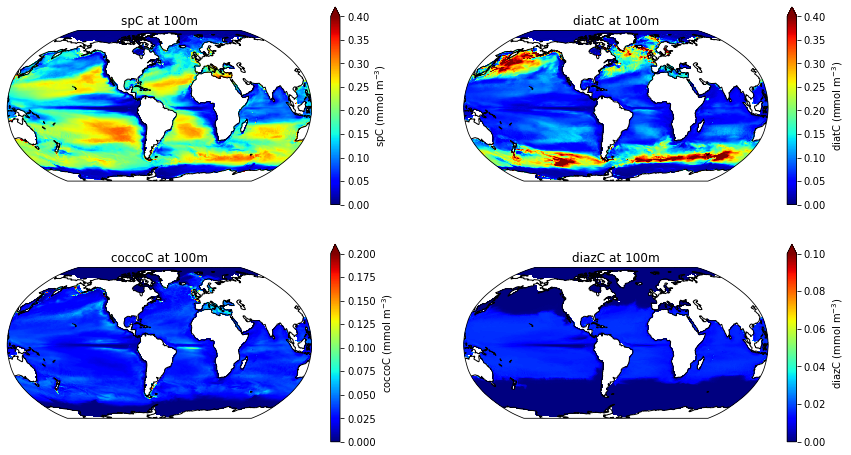

In [43]:
###### 
fig = plt.figure(figsize=(15,8))

ax = fig.add_subplot(2,2,3, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('coccoC at 100m', fontsize=12)
pc=ax.pcolormesh(lons, lats, cesm_ann_ds.coccoC.isel(z_l=6), cmap='jet',vmin=0,vmax=0.2,transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=1)
cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='coccoC (mmol m$^{-3}$)')

ax = fig.add_subplot(2,2,2, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('diatC at 100m', fontsize=12)
pc=ax.pcolormesh(lons, lats, cesm_ann_ds.diatC.isel(z_l=6), cmap='jet',vmin=0,vmax=0.4,transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=1)
cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='diatC (mmol m$^{-3}$)')

ax = fig.add_subplot(2,2,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('spC at 100m', fontsize=12)
ax.coastlines('110m',linewidth=1)
pc=ax.pcolormesh(lons, lats, cesm_ann_ds.spC.isel(z_l=6), cmap='jet',vmin=0,vmax=0.4,transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='spC (mmol m$^{-3}$)')

ax = fig.add_subplot(2,2,4, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('diazC at 100m', fontsize=12)
pc=ax.pcolormesh(lons, lats, cesm_ann_ds.diazC.isel(z_l=6), cmap='jet',vmin=0,vmax=0.1,transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=1)
cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='diazC (mmol m$^{-3}$)')

### Phytoplankton production maps

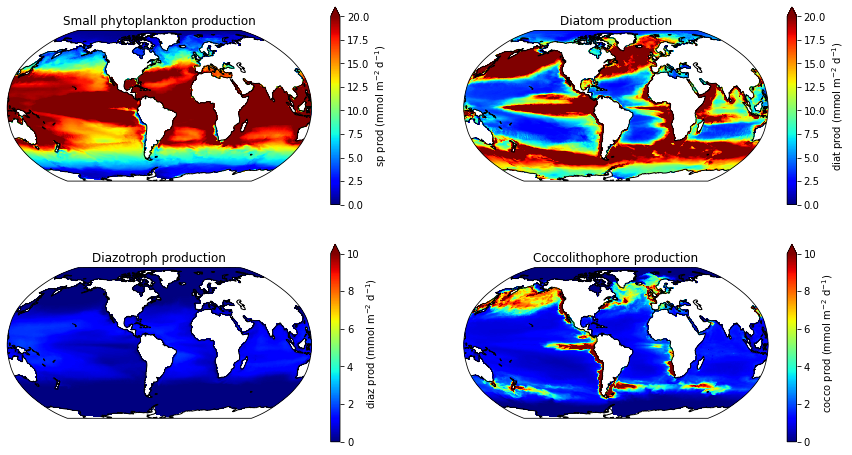

In [44]:
fig = plt.figure(figsize=(15,8))

ax = fig.add_subplot(2,2,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('Small phytoplankton production', fontsize=12)
tmp = cesm_ann_ds2.photoC_sp_zint * 86400. #convert to mmol/m2/d
pc=ax.pcolormesh(lons, lats, tmp, cmap='jet',vmin=0,vmax=20,transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=1)
cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='sp prod (mmol m$^{-2}$ d$^{-1}$)')

ax = fig.add_subplot(2,2,2, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('Diatom production', fontsize=12)
tmp = cesm_ann_ds2.photoC_diat_zint * 86400.
pc=ax.pcolormesh(lons, lats, tmp, cmap='jet',vmin=0,vmax=20,transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=1)
cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='diat prod (mmol m$^{-2}$ d$^{-1}$)')

ax = fig.add_subplot(2,2,3, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('Diazotroph production', fontsize=12)
tmp = cesm_ann_ds2.photoC_diaz_zint * 86400.
pc=ax.pcolormesh(lons, lats, tmp, cmap='jet',vmin=0,vmax=10,transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=1)
cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='diaz prod (mmol m$^{-2}$ d$^{-1}$)')

ax = fig.add_subplot(2,2,4, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('Coccolithophore production', fontsize=12)
tmp = cesm_ann_ds2.photoC_cocco_zint * 86400.
pc=ax.pcolormesh(lons, lats, tmp, cmap='jet',vmin=0,vmax=10,transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=1)
cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='cocco prod (mmol m$^{-2}$ d$^{-1}$)');

### Look at percent phytoC

In [45]:
phytoC = cesm_ann_ds.spC + cesm_ann_ds.diatC + cesm_ann_ds.diazC + cesm_ann_ds.coccoC
perc_sp = cesm_ann_ds.spC / (phytoC) * 100.
perc_cocco = cesm_ann_ds.coccoC / (phytoC) * 100.
perc_diat = cesm_ann_ds.diatC / (phytoC) * 100.
perc_diaz = cesm_ann_ds.diazC / (phytoC) * 100.

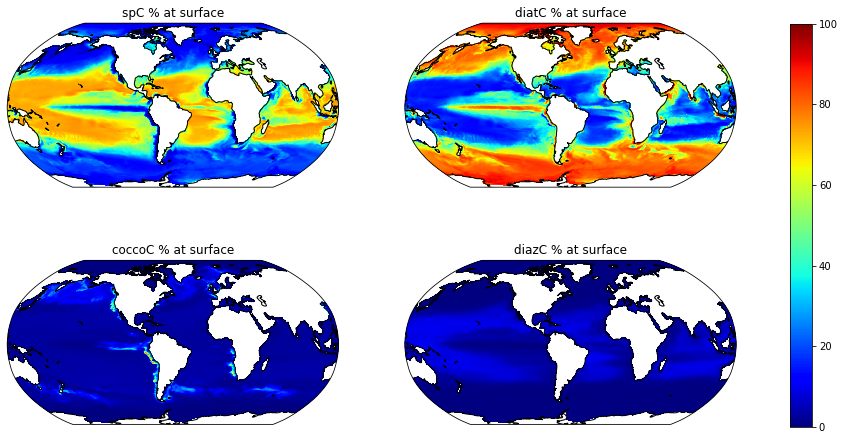

In [46]:
fig = plt.figure(figsize=(15,8))

ax = fig.add_subplot(2,2,3, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('coccoC % at surface', fontsize=12)
field = perc_cocco.isel(z_l=0)
pc=ax.pcolormesh(lons, lats, field, cmap='jet',vmin=0,vmax=100,transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=1)

ax = fig.add_subplot(2,2,2, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('diatC % at surface', fontsize=12)
field = perc_diat.isel(z_l=0)
pc=ax.pcolormesh(lons, lats, field, cmap='jet',vmin=0,vmax=100,transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=1)

ax = fig.add_subplot(2,2,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('spC % at surface', fontsize=12)
field = perc_sp.isel(z_l=0)
pc=ax.pcolormesh(lons, lats, field, cmap='jet',vmin=0,vmax=100,transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=1)

ax = fig.add_subplot(2,2,4, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('diazC % at surface', fontsize=12)
field = perc_diaz.isel(z_l=0)
pc=ax.pcolormesh(lons, lats, field, cmap='jet',vmin=0,vmax=100,transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=1)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.colorbar(pc, cax=cbar_ax);

### Plot zooC

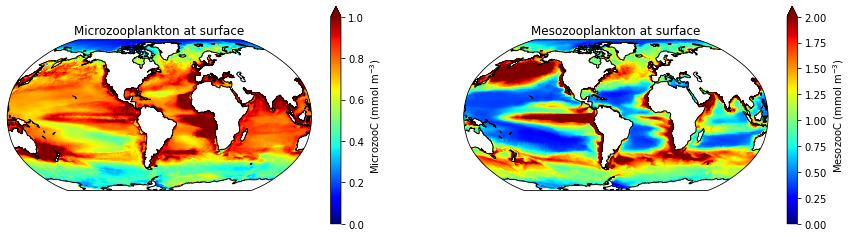

In [47]:
fig = plt.figure(figsize=(15,4))

ax = fig.add_subplot(1,2,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('Microzooplankton at surface', fontsize=12)
field = cesm_ann_ds.microzooC.isel(z_l=0)
pc=ax.pcolormesh(lons, lats, field, cmap='jet',vmin=0,vmax=1,transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=1)
cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='MicrozooC (mmol m$^{-3}$)')

ax = fig.add_subplot(1,2,2, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('Mesozooplankton at surface', fontsize=12)
field = cesm_ann_ds.mesozooC.isel(z_l=0)
pc=ax.pcolormesh(lons, lats, field, cmap='jet',vmin=0,vmax=2,transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=1)
cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='MesozooC (mmol m$^{-3}$)');


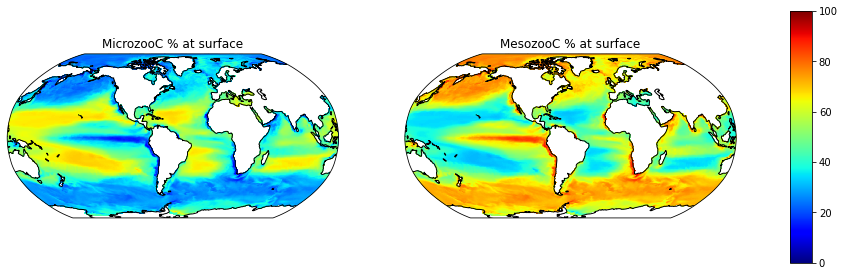

In [48]:
zooC = cesm_ann_ds.microzooC + cesm_ann_ds.mesozooC
perc_microzoo = cesm_ann_ds.microzooC / (zooC) * 100.
perc_mesozoo = cesm_ann_ds.mesozooC / (zooC) * 100.

fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(1,2,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('MicrozooC % at surface', fontsize=12)
field = perc_microzoo.isel(z_l=0)
pc=ax.pcolormesh(lons, lats, field, cmap='jet',vmin=0,vmax=100,transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=1)

ax = fig.add_subplot(1,2,2, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('MesozooC % at surface', fontsize=12)
field = perc_mesozoo.isel(z_l=0)
pc=ax.pcolormesh(lons, lats, field, cmap='jet',vmin=0,vmax=100,transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=1)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.colorbar(pc, cax=cbar_ax);

### Sum zooplankton biomass to see how close we are to obs-based estimates

In [49]:
microzoo_biomass=  ((cesm_ann_ds.microzooC * area_depth).sum(dim=('xh', 'yh'))).compute() #mmol/m
microzoo_biomass = microzoo_biomass * dz #mmol
microzoo_biomass = microzoo_biomass.sum(dim='z_l')
microzoo_biomass = microzoo_biomass.values * 0.001 * 1.e-15 * 12.011 #Pg C

print('Microzooplankton biomass is estimated at 0.24 Pg C (Buitenhuis et al., 2010). Here it is ', np.round(microzoo_biomass,4), ' Pg C.')


mesozoo_biomass= ((cesm_ann_ds.mesozooC * area_depth).sum(dim=('xh', 'yh'))).compute() #mmol/m
mesozoo_biomass = mesozoo_biomass * dz #mmol
mesozoo_biomass = mesozoo_biomass.sum(dim='z_l')
mesozoo_biomass = mesozoo_biomass.values * 0.001 * 1.e-15 * 12.011 #Pg C

print('Mesozooplankton biomass is estimated to be between 0.16 to 0.19 Pg C (Buitenhuis et al., 2006; Moriarty & OBrien, 2013). Here it is ', np.round(mesozoo_biomass,4), ' Pg C.')

Microzooplankton biomass is estimated at 0.24 Pg C (Buitenhuis et al., 2010). Here it is  0.2334  Pg C.
Mesozooplankton biomass is estimated to be between 0.16 to 0.19 Pg C (Buitenhuis et al., 2006; Moriarty & OBrien, 2013). Here it is  0.4093  Pg C.


### Plot zooplankton production maps

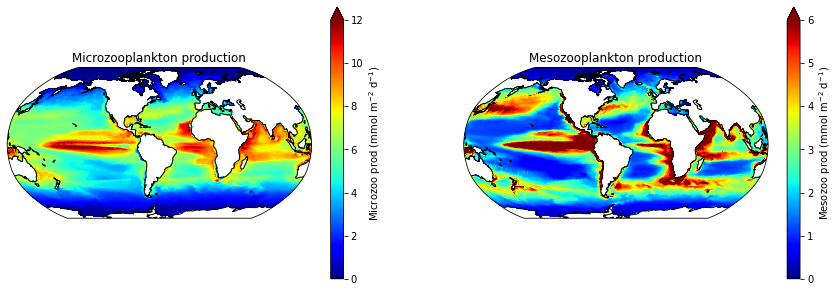

In [50]:
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(1,2,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('Microzooplankton production', fontsize=12)
tmp = cesm_ann_ds2.x_graze_microzoo_zint * 86400.
pc=ax.pcolormesh(lons, lats, tmp, cmap='jet',vmin=0,vmax=12,transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=1)
cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='Microzoo prod (mmol m$^{-2}$ d$^{-1}$)')

ax = fig.add_subplot(1,2,2, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('Mesozooplankton production', fontsize=12)
tmp = cesm_ann_ds2.x_graze_mesozoo_zint * 86400.
pc=ax.pcolormesh(lons, lats, tmp, cmap='jet',vmin=0,vmax=6,transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=1)
cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='Mesozoo prod (mmol m$^{-2}$ d$^{-1}$)')

## NPP - will add a map comparison to CbPM and VGPM soon!!

In [34]:
mmols_to_PgCyr = 1e-3 * 12. * 1e-15 * 365. * 86400.

In [35]:
variables = [f'photoC_{phyto}_zint' for phyto in ['diat', 'sp', 'diaz', 'cocco', 'TOT']]
variables = variables + ['CaCO3_PROD_zint','POC_FLUX_100m']

ds_glb = xr.Dataset()
for v in variables:
    ds_glb[v] = ((cesm_ann_ds2[v] * area).sum(dim=('xh', 'yh'))).compute() #mmol/m
    ds_glb[v].attrs = cesm_ann_ds2[v].attrs

    ds_glb[v] = ds_glb[v] * mmols_to_PgCyr        
    ds_glb[v].attrs['units'] = 'Pg C yr$^{-1}$'

ds_glb = ds_glb.compute()


print('TOTAL       NPP = ', np.round(ds_glb.photoC_TOT_zint.values,3))
print('-------------------')
print('diatom      NPP = ', np.round(ds_glb.photoC_diat_zint.values,3))
print('small phyto NPP = ', np.round(ds_glb.photoC_sp_zint.values,3))
print('diaz        NPP = ', np.round(ds_glb.photoC_diaz_zint.values,3))
print('cocco       NPP = ', np.round(ds_glb.photoC_cocco_zint.values,3))

TOTAL       NPP =  54.193
-------------------
diatom      NPP =  23.132
small phyto NPP =  26.74
diaz        NPP =  1.006
cocco       NPP =  3.314


In [36]:
print('diatom NPP is ', np.round((ds_glb['photoC_diat_zint']/ds_glb['photoC_TOT_zint']*100.).values,2),'% of total NPP.')

diatom NPP is  42.69 % of total NPP.


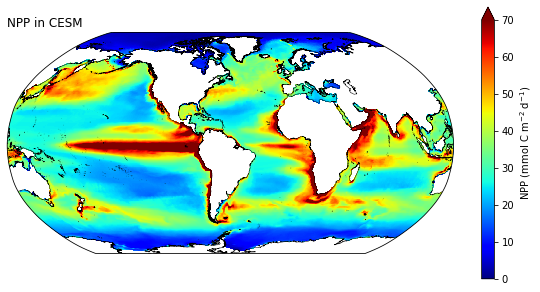

In [37]:
fig = plt.figure(figsize=(10,5))

import matplotlib.path as mpath
#----------
ax = fig.add_subplot(1,1,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('NPP in CESM', loc='left')

ax.coastlines('10m',linewidth=0.5)
field = cesm_ann_ds2.photoC_TOT_zint*86400.

pc=ax.pcolormesh(lons, lats, field,
                 vmin=0, vmax=70, 
                 cmap='jet',
                 transform=ccrs.PlateCarree())


cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='NPP (mmol C m$^{-2}$ d$^{-1}$)');

## Chlorophyll comparison

In [55]:
chl_file = '/glade/work/kristenk/satellite_data/Chl_cumulative_mean/A20021852020182.L3m_CU_CHL_chlor_a_9km.nc'
ds_chl = xr.open_dataset(chl_file, decode_times=False)
#units are mg/m3
tot_chl = cesm_ann_ds.spChl.isel(z_l=0) + cesm_ann_ds.diatChl.isel(z_l=0) + cesm_ann_ds.coccoChl.isel(z_l=0) + cesm_ann_ds.diazChl.isel(z_l=0)

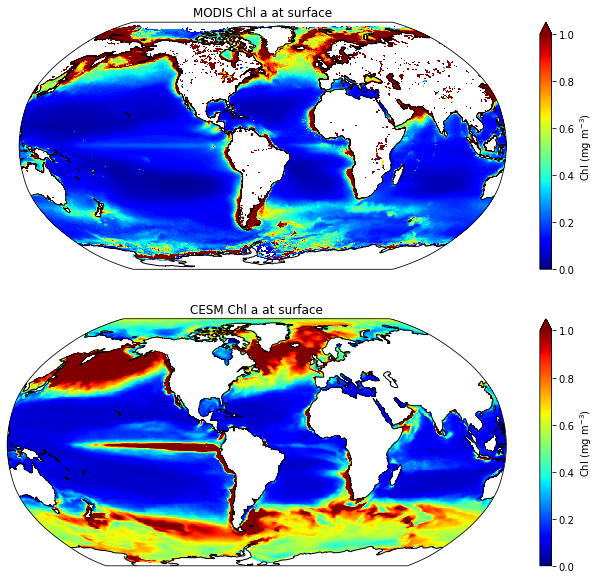

In [56]:
fig = plt.figure(figsize=(12,10))


ax = fig.add_subplot(2,1,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('MODIS Chl a at surface', fontsize=12)
ax.coastlines('110m',linewidth=1)
pc=ax.pcolormesh(ds_chl.lon, ds_chl.lat, ds_chl.chlor_a, cmap='jet',
                 vmin=0,vmax=1,
                 transform=ccrs.PlateCarree())

cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='Chl (mg m$^{-3}$)')

ax = fig.add_subplot(2,1,2, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('CESM Chl a at surface', fontsize=12)
ax.coastlines('110m',linewidth=1)
pc=ax.pcolormesh(lons, lats, tot_chl, cmap='jet',
                 vmin=0,vmax=1,
                 transform=ccrs.PlateCarree())

cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='Chl (mg m$^{-3}$)')


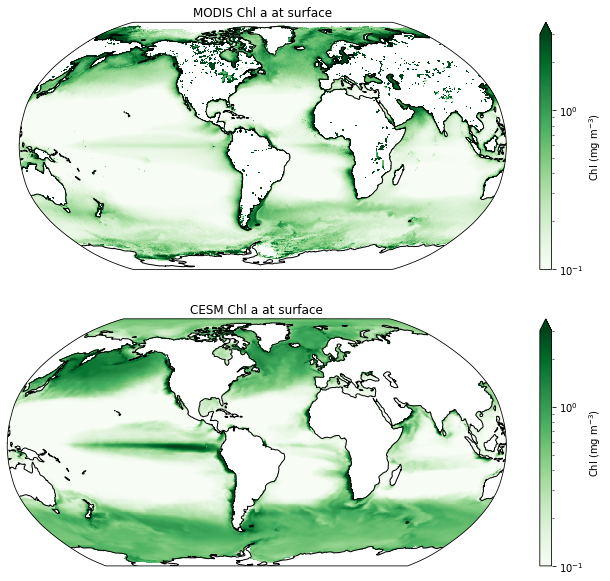

In [57]:
fig = plt.figure(figsize=(12,10))


ax = fig.add_subplot(2,1,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('MODIS Chl a at surface', fontsize=12)
ax.coastlines('110m',linewidth=1)
pc=ax.pcolormesh(ds_chl.lon.values, ds_chl.lat.values, ds_chl.chlor_a, 
                 cmap='Greens',norm=colors.LogNorm(vmin=0.1, vmax=3),
                 transform=ccrs.PlateCarree())

cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='Chl (mg m$^{-3}$)')

ax = fig.add_subplot(2,1,2, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('CESM Chl a at surface', fontsize=12)
ax.coastlines('110m',linewidth=1)
lon, lat, field = utils.adjust_pop_grid(lons, lats,  tot_chl)
pc=ax.pcolormesh(lon, lat, field,
                 cmap='Greens',norm=colors.LogNorm(vmin=0.1, vmax=3),
                 transform=ccrs.PlateCarree())

cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='Chl (mg m$^{-3}$)')


### Zooplankton production (zoo grazing - zoo respiration)
#### Should be ~25% of NPP

In [38]:
variables = [f'x_graze_{zoo}_zint' for zoo in ['microzoo', 'mesozoo']]

for v in variables:
    ds_glb[v] = ds_glb[v] = ((cesm_ann_ds2[v] * area).sum(dim=('xh', 'yh'))).compute() #mmol/m
    ds_glb[v].attrs = cesm_ann_ds2[v].attrs

    ds_glb[v] = ds_glb[v] * mmols_to_PgCyr        
    ds_glb[v].attrs['units'] = 'Pg C yr$^{-1}$'

ds_glb = ds_glb.compute()
ds_glb

<xarray.Dataset>
Dimensions:                ()
Data variables:
    photoC_diat_zint       float64 23.13
    photoC_sp_zint         float64 26.74
    photoC_diaz_zint       float64 1.006
    photoC_cocco_zint      float64 3.314
    photoC_TOT_zint        float64 54.19
    CaCO3_PROD_zint        float64 1.089
    POC_FLUX_100m          float64 7.35
    x_graze_microzoo_zint  float64 8.538
    x_graze_mesozoo_zint   float64 4.567

In [39]:
## calculate % zoo prod of NPP 
npp_tot = ds_glb.photoC_TOT_zint.values
zoo_prod = ds_glb.x_graze_microzoo_zint.values + ds_glb.x_graze_mesozoo_zint.values
print('• Zooplankton production is ', (zoo_prod/npp_tot * 100.), '% of NPP.')
## calculate % microzooplankton (zoo1) prod of total zoo prod
micro_prod=ds_glb.x_graze_microzoo_zint.values
print('• Microzooplankton production is ', (micro_prod/zoo_prod * 100.), '% of total zooplankton production.')
print('• Microzooplankton production is ', (micro_prod/npp_tot * 100.), '% of NPP.')

• Zooplankton production is  24.182014356092125 % of NPP.
• Microzooplankton production is  65.1490436143508 % of total zooplankton production.
• Microzooplankton production is  15.75435107967903 % of NPP.


### Z-ratio (Stock & Dunne, 2010)

In [40]:
file = '/glade/work/kristenk/z-ratio/z_ratio_POPgrid2.nc'
ds_zratio = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [41]:
z_ratio = cesm_ann_ds2.x_graze_mesozoo_zint / cesm_ann_ds2.photoC_TOT_zint

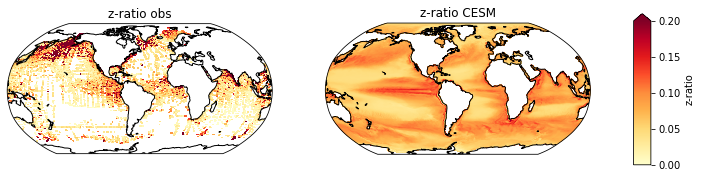

In [42]:
fig = plt.figure(figsize=(12,3))

ax = fig.add_subplot(1,2,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('z-ratio obs', fontsize=12)
lon, lat, field = utils.adjust_pop_grid(ds_zratio.TLONG, ds_zratio.TLAT, ds_zratio.z_ratio)
pc=ax.pcolormesh(lon, lat, field, cmap='YlOrRd',vmin=0,vmax=0.2,transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=1)

ax = fig.add_subplot(1,2,2, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('z-ratio CESM', fontsize=12)
pc=ax.pcolormesh(lons, lats, z_ratio, cmap='YlOrRd',vmin=0,vmax=0.2,transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=1)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.colorbar(pc, cax=cbar_ax,extend='max', label='z-ratio');

### MAREDAT Micozooplankton/zoo1+zoo2 comparison

In [63]:
file = '/glade/work/kristenk/MAREDAT/microzooplankton/mean_fields/MAREDAT_microzoo_means.nc'
maredat_microzoo_ds=xr.open_dataset(file,decode_times=False,decode_coords=False)

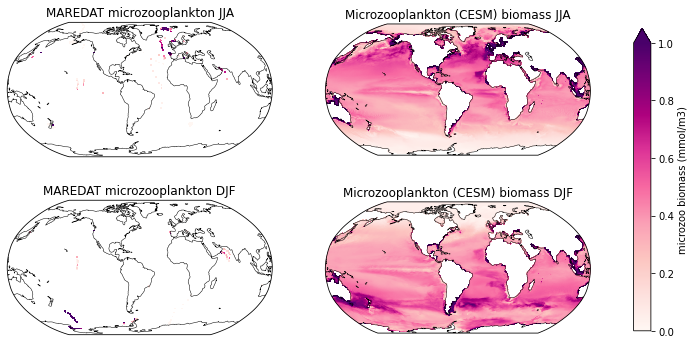

In [64]:
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(2,2,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('MAREDAT microzooplankton JJA', fontsize=12)
tmp = maredat_microzoo_ds.JJA_mean_top100m/12.011 #converting from mg/m3 to mmol/m3
pc=ax.pcolormesh(maredat_microzoo_ds.LONGITUDE, maredat_microzoo_ds.LATITUDE, tmp, cmap='RdPu',vmin=0,vmax=1,transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)

ax = fig.add_subplot(2,2,2, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('Microzooplankton (CESM) biomass JJA', fontsize=12)
tmp = cesm_mon_ds.microzooC.isel(month=[5,6,7],z_l=slice(0,10)).mean(dim='z_l').mean(dim='month')
pc=ax.pcolormesh(lons, lats, tmp, cmap='RdPu',vmin=0,vmax=1,transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)

ax = fig.add_subplot(2,2,3, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('MAREDAT microzooplankton DJF', fontsize=12)
tmp = maredat_microzoo_ds.DJF_mean_top100m/12.011 #converting from mg/m3 to mmol/m3
pc=ax.pcolormesh(maredat_microzoo_ds.LONGITUDE, maredat_microzoo_ds.LATITUDE, tmp, cmap='RdPu',vmin=0,vmax=1,transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)

ax = fig.add_subplot(2,2,4, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('Microzooplankton (CESM) biomass DJF', fontsize=12)
tmp = cesm_mon_ds.microzooC.isel(month=[11,0,1],z_l=slice(0,10)).mean(dim='z_l').mean(dim='month')
pc=ax.pcolormesh(lons, lats, tmp, cmap='RdPu',vmin=0,vmax=1,transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)


fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.colorbar(pc, cax=cbar_ax,extend='max',label='microzoo biomass (mmol/m3)');

### COPEPOD comparison (Mesozooplankton)

In [65]:
file = '/glade/u/home/kristenk/work/copepod-biomass/data/POP_gx1v7/copepod-2012__cmass-m00-qtr.zarr'
ds_copepod = xr.open_zarr(file)
ds_copepod['copepod_C']=ds_copepod.copepod_C/12.011

In [66]:
cesm_ann_ds.z_l[9]

<xarray.DataArray 'z_l' ()>
array(200.)
Coordinates:
    z_l      float64 200.0
Attributes:
    units:      meters
    long_name:  Depth at cell center
    axis:       Z
    positive:   down
    edges:      z_i

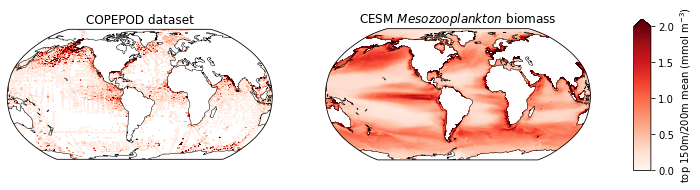

In [67]:
fig = plt.figure(figsize=(12,3))

ax = fig.add_subplot(1,2,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('COPEPOD dataset', fontsize=12)
lon, lat, field = utils.adjust_pop_grid(ds_zratio.TLONG, ds_zratio.TLAT,  ds_copepod.copepod_C)
pc=ax.pcolormesh(lon, lat, field, cmap='Reds',vmin=0,vmax=2,transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)

ax = fig.add_subplot(1,2,2, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('CESM ${\it Mesozooplankton}$ biomass', fontsize=12)
tmp = cesm_ann_ds.mesozooC.isel(z_l=slice(0,10)).mean(dim='z_l') #take mean just over the top 200m
pc=ax.pcolormesh(lons, lats, tmp, cmap='Reds',vmin=0,vmax=2,transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.colorbar(pc, cax=cbar_ax,extend='max', label='top 150m/200m mean (mmol m$^{-3}$)');

### compare to spatially interpolated COPEPOD climatology
#### (dataset is in units of mgC/m2, despite its being labeled otherwise, personal communication with Colleen Petrik)

In [27]:
file = '/glade/u/home/kristenk/work/copepod-biomass/obsglmm_zmeso_vint_200m_monthly_climatology.nc'
ds_copepod_clim = xr.open_dataset(file)

In [28]:
ds_copepod_clim.zmeso200.attrs['units'] = 'mgC m-2'

### depth integrate CESM and convert to same units

In [29]:
### depth integrate and convert model to mol/m2
cesm_mon_ds['mesozooC_zint'] = ((cesm_mon_ds.mesozooC) * dz).sum(dim='z_l') #in mmol/m2
cesm_mon_ds['mesozooC_zint'] = cesm_mon_ds['mesozooC_zint'] * 12.011 #convert to mgC/m2
cesm_mon_ds['mesozooC_zint'].attrs['units'] = 'mgC m-2'

In [30]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

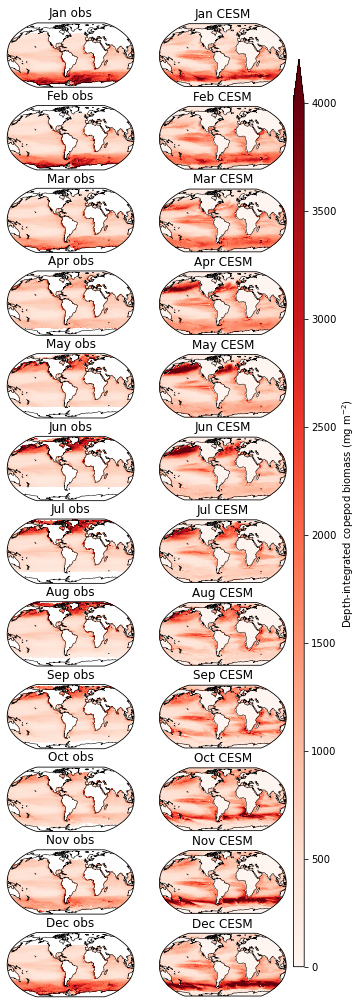

In [31]:
fig = plt.figure(figsize=(5,18))

for row in np.arange(1,13):
    
    ts=row-1
    
    plot = row*2 - 1
    ax = fig.add_subplot(12,2,plot, projection=ccrs.Robinson(central_longitude=305.0))
    ax.set_title(months[ts]+' obs', fontsize=12)
    pc=ax.pcolormesh(ds_copepod_clim.Lon, ds_copepod_clim.Lat, ds_copepod_clim.zmeso200.isel(month=ts), 
                     cmap='Reds',vmin=0,vmax=4000,transform=ccrs.PlateCarree())
    ax.coastlines('110m',linewidth=0.5)
    
    plot = row*2
    ax = fig.add_subplot(12,2,plot, projection=ccrs.Robinson(central_longitude=305.0))
    ax.set_title(months[ts]+' CESM', fontsize=12)
    tmp = cesm_mon_ds.mesozooC_zint.isel(month=ts)
    pc=ax.pcolormesh(lons, lats, tmp, cmap='Reds',vmin=0,vmax=4000,transform=ccrs.PlateCarree())
    ax.coastlines('110m',linewidth=0.5)

cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])
fig.colorbar(pc, cax=cbar_ax,extend='max', label='Depth-integrated copepod biomass (mg m$^{-2}$)');

## Calcification

In [43]:
## GLOBALLY integrated calcification; observation-based estimates range from 0.8 to 2.4 Pg CaCO3 per year 
## (Feely et al., 2004, Maranon et al., 2016, Smith et al., 2016, Balch et al., 2007, Iglesias-Rodriguez et al., 2002)
print('Globally integrated calcification is',np.round(ds_glb['CaCO3_PROD_zint'].values,4), 'Pg C per year')
print('(should be between 0.6 to 2.4 Pg C per year)')

Globally integrated calcification is 1.089 Pg C per year
(should be between 0.6 to 2.4 Pg C per year)


In [44]:
#read in mean PIC
pic_file = '/glade/work/kristenk/satellite_data/processed/PIC_mean2003to2018_1deg.nc'
ds_pic=xr.open_dataset(pic_file, decode_times=False)

#convert to mmol/m3 from mg/m3
ds_pic['PIC']=ds_pic.PIC / 12.011

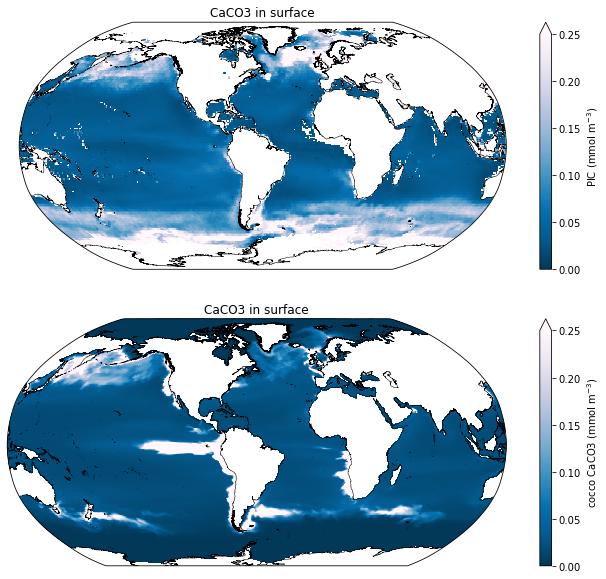

In [45]:
fig = plt.figure(figsize=(12,10))


ax = fig.add_subplot(2,1,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('CaCO3 in surface', fontsize=12)
ax.coastlines('10m',linewidth=0.5)
pc=ax.pcolormesh(ds_pic.lon.values, ds_pic.lat.values, ds_pic.PIC, cmap='PuBu_r',vmin=0,vmax=0.25,transform=ccrs.PlateCarree())

cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='PIC (mmol m$^{-3}$)')

ax = fig.add_subplot(2,1,2, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('CaCO3 in surface', fontsize=12)
ax.coastlines('10m',linewidth=0.5)
field = cesm_ann_ds.coccoCaCO3.isel(z_l=0)
pc=ax.pcolormesh(lons, lats, field, cmap='PuBu_r',vmin=0,vmax=0.25,transform=ccrs.PlateCarree())

cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='cocco CaCO3 (mmol m$^{-3}$)')


### cocco PIC/POC

In [ ]:
fig = plt.figure(figsize=(8,3))
ax = fig.add_subplot(1,1,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('cocco PIC/POC in surface', fontsize=12)
ax.coastlines('10m',linewidth=0.5)
field = (cesm_ann_ds.coccoCaCO3.isel(z_l=0)/cesm_ann_ds.coccoC.isel(z_l=0)).where(cesm_ann_ds.coccoC.isel(z_l=0)>0.001)
pc=ax.pcolormesh(lons, lats, field, cmap='Oranges',vmin=0,vmax=2,transform=ccrs.PlateCarree())

cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='cocco PIC/POC')


## A few Antarctic views - will add a comparison to VGPM and CbPM obs soon!!

In [ ]:
fig = plt.figure(figsize=(6,5))

import matplotlib.path as mpath
#----------
ax = fig.add_subplot(1,1,1, projection=ccrs.SouthPolarStereo())
ax.set_title('NPP in CESM', loc='left')
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())

ax.coastlines('10m',linewidth=0.5)
field = cesm_ann_ds2.photoC_TOT_zint*86400.

pc=ax.pcolormesh(lons, lats, field,
                 vmin=0, vmax=70, 
                 cmap='jet',
                 transform=ccrs.PlateCarree())


cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='NPP (mmol C m$^{-2}$ d$^{-1}$)');

In [ ]:
fig = plt.figure(figsize=(12,6))

# obs -----------------------------------------------------------------
ax = fig.add_subplot(1,2,1, projection=ccrs.SouthPolarStereo())

ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())

ax.coastlines('110m',linewidth=0.5)
ax.set_title('COPEPOD')
lon, lat, field = utils.adjust_pop_grid(ds_zratio.TLONG, ds_zratio.TLAT, ds_copepod.copepod_C)
pc=ax.pcolormesh(lon, lat, field, #converting from mg/m3 to mmol/m3
                 vmin=0, vmax=2, 
                 cmap='Reds',
                 transform=ccrs.PlateCarree())

########################

ax = fig.add_subplot(1,2,2, projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())
ax.set_title('Mesozoo biomass DJF', fontsize=12)
tmp = cesm_ann_ds.mesozooC.isel(z_l=slice(0,10)).mean(dim='z_l') #take mean just over the top 200m
pc=ax.pcolormesh(lons, lats, tmp, 
                 vmin=0, vmax=2, 
                 cmap='Reds',
                 transform=ccrs.PlateCarree())


ax.coastlines('110m',linewidth=0.5)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.colorbar(pc, cax=cbar_ax,extend='max', label='mesozooplankton biomass (mmol/m3)');

## N fixation

In [ ]:
#global integral
tmp = (cesm_ann_ds['diaz_Nfix'] * area_depth).sum(dim=('xh', 'yh')).compute() #mmol/m
ds_glb['diaz_Nfix'] = (tmp * dz).sum(dim='z_l') #mmol
ds_glb['diaz_Nfix'] = ds_glb['diaz_Nfix'] * 86400. * 365. * 0.001 * 14. * 1e-12 #convert to Tg N / yr
ds_glb['diaz_Nfix'].values
print('Globally integrated marine nitrogen fixation is',np.round(ds_glb['diaz_Nfix'].values,4), 'Tg N per year')
print('(should be between ~163.2 (range between 125.6 and 222.9 Tg N per year; Wang et al., 2019)')

In [ ]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,1,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('N fixation', fontsize=12)
ax.coastlines('10m',linewidth=0.5)
field = (cesm_ann_ds['diaz_Nfix']*dz).sum(dim='z_l').where(ds_grid.wet==1) * 86400. * 365.
pc=ax.pcolormesh(lons, lats, field, cmap='jet',
                 #vmin=0,vmax=2,
                 transform=ccrs.PlateCarree())

cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='N fixation (mmol/m2/y)')


## Alkalinity

In [ ]:
#just getting this for the coords (that don't have nans)
path = '/glade/work/kristenk/GLODAPv2_regridded/'
files =[path+'TAlk_GLODAP_normal1deg_33depths.nc', path+'salinity_GLODAP_normal1deg_33depths.nc']
ds_glodap = xr.open_mfdataset(files, decode_times=False, decode_coords=False)

In [ ]:
ds_glodap.depth_surface

In [ ]:
### Salinity normalized ALK
ds_glodap['sAlk'] = ds_glodap.TAlk/ds_glodap.salinity * 35.

In [ ]:
#cesm_ann_ds['sAlk'] = cesm_ann_ds.ALK/cesm_ann_ds.so * 35.

In [ ]:
#plot surface alkalinity

fig = plt.figure(figsize=(18,10))

#---- CESM panel
ax = fig.add_subplot(3,1,1, projection=ccrs.Robinson(central_longitude=305.0))
# ax.coastlines('10m',linewidth=0.5)
# ax.set_title('CESM annual mean surface Alk', fontsize=10)
# lon, lat, field = utils.adjust_pop_grid(lons, lats,  cesm_ann_ds.sAlk.isel(z_l=0))
# pc1=ax.pcolormesh(lon, lat, 
#                  field, cmap='Oranges',
#                   vmin=2200, vmax=2500, 
#                  transform=ccrs.PlateCarree())
# cbar1 = fig.colorbar(pc1, ax=ax,extend='max',label='sAlk (mmol m$^{-3}$)')

#---- OBS panel
ax = fig.add_subplot(3,1,2, projection=ccrs.Robinson(central_longitude=305.0))
ax.coastlines('10m',linewidth=0.5)
ax.set_title('GLODAPv2 annual mean surface Alk', fontsize=10)
field = ds_glodap.sAlk.isel(depth_surface=0)
pc2=ax.pcolormesh(ds_glodap.lon, ds_glodap.lat, 
                 field, cmap='Oranges',
                  vmin=2200, vmax=2500, 
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc2, ax=ax,extend='max',label='sAlk (mmol m$^{-3}$)')

# #---- DIFF panel
# sALK_diff = cesm_ann_ds.sAlk - ds_glodap.sAlk

# ax = fig.add_subplot(3,1,3, projection=ccrs.Robinson(central_longitude=305.0))
# ax.coastlines('10m',linewidth=0.5)
# ax.set_title('Surface Alk model bias', fontsize=10)
# lon, lat, field = utils.adjust_pop_grid(lons, lats,  sALK_diff.isel(z_t=0))
# pc3=ax.pcolormesh(lon, lat, 
#                  field, vmin=-50, vmax=50, cmap='bwr',
#                  transform=ccrs.PlateCarree())
# cbar1 = fig.colorbar(pc3, ax=ax,extend='both',label='sAlk bias (mmol m$^{-3}$)')

## Global POC export

In [ ]:
print('Globally integrated POC flux is',np.round(ds_glb['POC_FLUX_100m'].values,3), 'Pg C per year')

### Export ratio

In [ ]:
#plot E-RATIO
eratio = cesm_ann_ds2.POC_FLUX_100m/cesm_ann_ds2.photoC_TOT_zint

fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(1,1,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.coastlines('10m',linewidth=0.5)
ax.set_title('CESM e-ratio at 100m', fontsize=10)
field = eratio
pc1=ax.pcolormesh(lons, lats, 
                 field, cmap='jet',
                  vmin=0.05, vmax=0.3, 
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc1, ax=ax,extend='both',label='export ratio')


## Iron distributions

In [ ]:
mmolm3_to_nM = 1e3
cesm_ann_ds['Fe'] = cesm_ann_ds['Fe'] * mmolm3_to_nM
cesm_ann_ds['Fe'].attrs['units'] = 'nM'

In [ ]:
dFe_obs_file = '/glade/u/home/kristenk/cesm2-marbl/notebooks/discrete_obs/dFe-database-2021-05-20.csv'
df = pd.read_csv(dFe_obs_file, na_values=-999.).dropna(axis=0, how='all')

In [ ]:
df

In [ ]:
### was trying to make 100 mean average - will revisit this later
#((cesm_ann_ds['Fe'] * dz).isel(z_l=slice(0,7)).sum(dim='z_l')/100).plot()

### Plot iron at surface - will make other depths later

In [ ]:
fig = plt.figure(figsize=(18,7))

##### top 100m

### CESM
ax = fig.add_subplot(1,2,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.coastlines('10m',linewidth=0.5)
ax.set_title('CESM Fe at surface', fontsize=10)

field = cesm_ann_ds['Fe'].isel(z_l=0)
pc1=ax.pcolormesh(lons, lats, 
                 field, cmap='jet',
                  vmin=0.05, vmax=1.6, 
                 transform=ccrs.PlateCarree())


### obs
ax = fig.add_subplot(1,2,2, projection=ccrs.Robinson(central_longitude=305.0))
ax.coastlines('10m',linewidth=0.5)
ax.set_title('Obs Fe at surface', fontsize=10)


df_sub = df.loc[(df.depth <= 2.5)]
sc = ax.scatter(df_sub.lon, df_sub.lat, c=df_sub.dFe_obs.values,
                cmap='jet',
                vmin=0.05, vmax=0.6, 
                transform=ccrs.PlateCarree())

In [ ]:
cluster.close()